In [1]:
# browse thru youtube videos and identify the most genuine state dialects
# copy the links
# run the script to download the audio files only (mp3 format which to be save in "download" folder)

import ssl
import os
import ffmpeg

ssl._create_default_https_context = ssl._create_unverified_context


link1="https://youtu.be/vx9fckCS17Q"
link2="https://youtu.be/_K8Wbd2IHxY"
link3="https://youtu.be/OBY0W4UfE5s"
link4="https://youtu.be/FxkW7U38pNk"
link5="https://youtu.be/zFgrq6Buj1E"
link6="https://youtu.be/aadhFHr3nOM"
link7="https://youtu.be/X_MBJNuX5A8"
link8="https://youtu.be/ROTLYmdNy08"
link9="https://youtu.be/6IYAWp00z5Q"
link10="https://youtu.be/gx_a7E9c3Uw"

new_links=[link1,link2,link3,link4,link5,link6,link7,link8,link9,link10]





In [2]:
import pandas as pd
import numpy as np

scraped_links=pd.read_csv('../scraped_links.csv')['scraped_links'].to_list()
links=list(set(new_links)-set(scraped_links))
links

['https://youtu.be/vx9fckCS17Q']

In [4]:
pd.read_csv('../scraped_links.csv')

,scraped_links,dialect
0,https://youtu.be/2euzyptSo5c,penang
1,https://youtu.be/4szHdf4_EZw,penang
2,https://youtu.be/N_dZ2e4qPoQ,penang
3,https://youtu.be/LFbHiYSJT1M,penang
4,https://youtu.be/i-25lqPvgBk,penang
5,https://youtu.be/DSlNrMgeoDE,penang
6,https://youtu.be/kP_-Fa4nIWw,penang
7,https://youtu.be/mEqnZNTwggM,penang
8,https://youtu.be/48Jz-_jKVV4,penang
9,https://youtu.be/3aF3IPVwc6A,penang


In [5]:
import pandas as pd
import numpy as np

df=pd.DataFrame({'scraped_links':links,'dialect':'kelantan'})
update_scraped_links=pd.concat([pd.read_csv('../scraped_links.csv'),df])
update_scraped_links.to_csv('../scraped_links.csv', index=False)

In [6]:
for link in links:
    os.system("youtube-dl -x --audio-format m4a --no-check-certificate --verbose "+link)
    #os.system("mv *.m4a ./download") #linux
    os.system("move *.m4a ./download")  #window

In [7]:
#combine all the downloaded youtube m4a files into one mp3 file

from pydub import AudioSegment

from pydub import AudioSegment
import os

combined = AudioSegment.empty()  # Initialize an empty AudioSegment
for audio in os.listdir("./download/"):
    sound = AudioSegment.from_file(f"./download/{audio}", format="m4a")
    combined += sound  # Append each audio file to the combined AudioSegment

combined.export("./download/combined.mp3", format="mp3")


<_io.BufferedRandom name='./download/combined.mp3'>

In [8]:
import os

os.chdir("C:\\Users\\izard\\Documents\\GitHub\\malaysian-dialects-audio\\kelantan\\download")

In [9]:
#os.system("rm ./download/*.m4a") #linux
os.system("del *.m4a") #windows

1

In [10]:
# Import the AudioSegment class for processing audio and the 
# split_on_silence function for separating out silent chunks.

from pydub import AudioSegment
from pydub.silence import split_on_silence
import ffmpeg

import datetime as dt

# Define a function to normalize a chunk to a target amplitude.
def match_target_amplitude(aChunk, target_dBFS):
    ''' Normalize given audio chunk '''
    change_in_dBFS = target_dBFS - aChunk.dBFS
    return aChunk.apply_gain(change_in_dBFS)

#os.chdir("C:\\Users\\izard\\Documents\\GitHub\\malaysian-dialects-audio\\kelantan\\download")

# Load your audio.
song = AudioSegment.from_mp3("combined.mp3")

# Split track where the silence is 0.5 seconds or more and get chunks using 
# the imported function.
chunks = split_on_silence (
    # Use the loaded audio.
    song, 
    # Specify that a silent chunk must be at least 0.5 seconds or 500 ms long.
    min_silence_len = 500,
    # Consider a chunk silent if it's quieter than -16 dBFS.
    # (You may want to adjust this parameter.)
    silence_thresh = -16
)

os.chdir("C:\\Users\\izard\\Documents\\GitHub\\malaysian-dialects-audio\\kelantan\\chunks")

# Process each chunk with your parameters
for i, chunk in enumerate(chunks):
    # Create a silence chunk that's 0.5 seconds (or 500 ms) long for padding.
    silence_chunk = AudioSegment.silent(duration=500)

    # Add the padding chunk to beginning and end of the entire chunk.
    audio_chunk = silence_chunk + chunk + silence_chunk

    # Normalize the entire chunk.
    normalized_chunk = match_target_amplitude(audio_chunk, -20.0)

    # Export the audio chunk with new bitrate.
    print("Exporting chunk{0}.mp3.".format(i))
    normalized_chunk.export(
        ".//"+str(dt.datetime.now().date().strftime("%Y-%m-%d"))+"-kelantan-chunk{0}.mp3".format(i),
        bitrate = "192k",
        format = "mp3"
    )

Exporting chunk0.mp3.
Exporting chunk1.mp3.
Exporting chunk2.mp3.
Exporting chunk3.mp3.
Exporting chunk4.mp3.
Exporting chunk5.mp3.
Exporting chunk6.mp3.
Exporting chunk7.mp3.
Exporting chunk8.mp3.
Exporting chunk9.mp3.
Exporting chunk10.mp3.
Exporting chunk11.mp3.
Exporting chunk12.mp3.
Exporting chunk13.mp3.
Exporting chunk14.mp3.
Exporting chunk15.mp3.
Exporting chunk16.mp3.
Exporting chunk17.mp3.
Exporting chunk18.mp3.
Exporting chunk19.mp3.
Exporting chunk20.mp3.
Exporting chunk21.mp3.
Exporting chunk22.mp3.
Exporting chunk23.mp3.
Exporting chunk24.mp3.
Exporting chunk25.mp3.
Exporting chunk26.mp3.
Exporting chunk27.mp3.
Exporting chunk28.mp3.
Exporting chunk29.mp3.
Exporting chunk30.mp3.
Exporting chunk31.mp3.
Exporting chunk32.mp3.
Exporting chunk33.mp3.
Exporting chunk34.mp3.
Exporting chunk35.mp3.
Exporting chunk36.mp3.
Exporting chunk37.mp3.
Exporting chunk38.mp3.
Exporting chunk39.mp3.
Exporting chunk40.mp3.
Exporting chunk41.mp3.
Exporting chunk42.mp3.
Exporting chunk43.mp3

In [11]:
# remove chunks that have less than 5 second length

from pydub import AudioSegment
import os

def is_short_mp3(file_path):
    audio = AudioSegment.from_mp3(file_path)
    return len(audio) < 5000  # Duration in milliseconds (5 seconds)

In [12]:
# Example usage:
folder_path = "C:\\Users\\izard\\Documents\\GitHub\\malaysian-dialects-audio\\kelantan\\chunks"
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if filename.lower().endswith(".mp3") and is_short_mp3(file_path):
        os.remove(file_path)

In [13]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio
import pandas as pd

In [24]:
os.listdir()[24]

'2024-06-14-kelantan-chunk386.mp3'

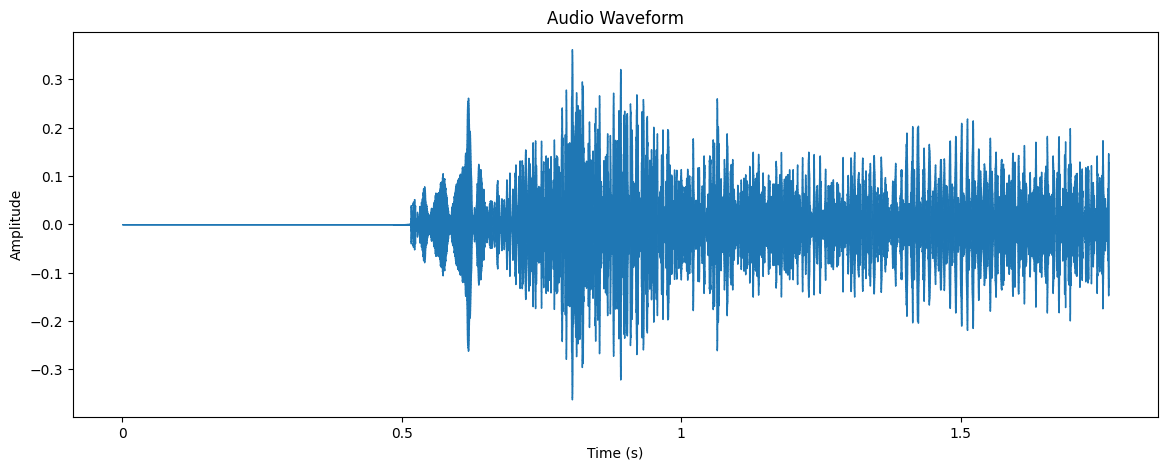

In [25]:
# Step 1: Load and visualize the audio

file_path = "C:\\Users\\izard\\Documents\\GitHub\\malaysian-dialects-audio\\kelantan\\chunks\\"+os.listdir()[4]
audio, sr = librosa.load(file_path, sr=None)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(audio, sr=sr)
plt.title("Audio Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [26]:
# Step 2: Play the audio
Audio(audio, rate=sr)

In [42]:
# Step 3: Collect annotations
annotations = []
while True:
    start_time = float(input("Enter start time (in seconds): "))
    end_time = float(input("Enter end time (in seconds): "))
    label = input("Enter label: ")
    
    annotations.append((file_path,start_time, end_time, label))
    
    more = input("Do you want to annotate more chunks? (yes/no): ").lower()
    if more == 'no':
        break

In [45]:
# Step 4: Save annotations into a DataFrame
df_annotations = pd.DataFrame(annotations, columns=['Audio File','Start Time', 'End Time', 'Label'])



In [46]:
df_annotations

,Audio File,Start Time,End Time,Label
0,C:\Users\izard\Documents\GitHub\malaysian-dial...,0.5,2.5,Dikatakan pemilik kedai ini dahulu
